importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,5]

#                   Loading dataset




In [2]:

df = pd.read_csv('Medicalpremium.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
df.head()


Number of rows and columns in the data set:  (986, 11)



,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.columns


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [6]:
len(df.columns)

11

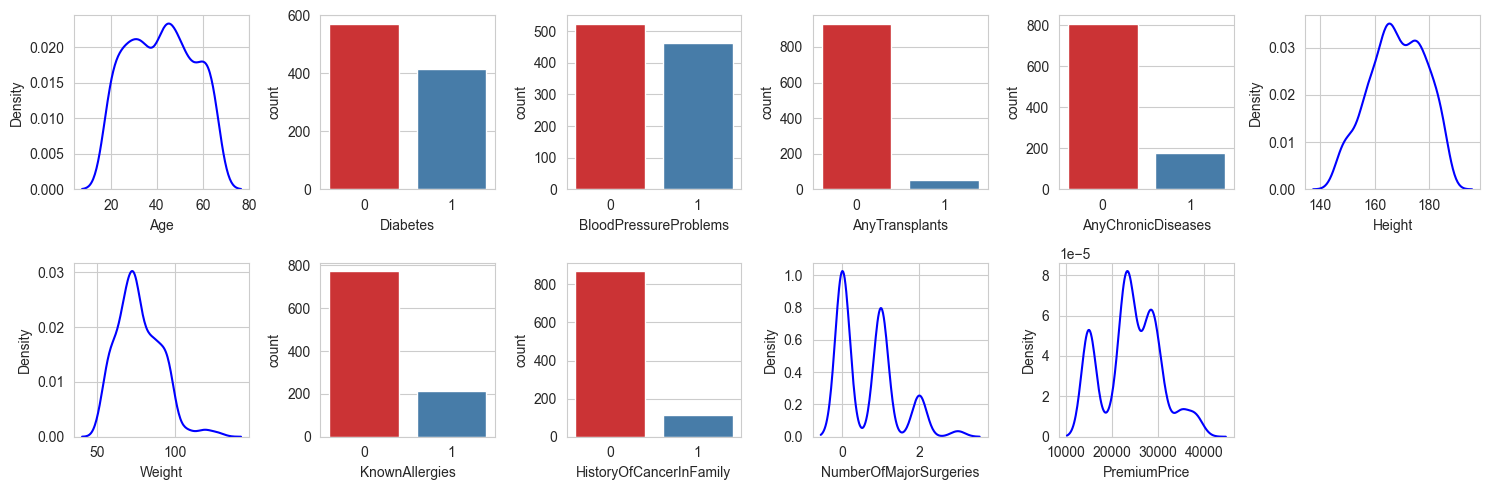

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors and styles
sns.set_palette("Set2")  # Example color palette
sns.set_style("whitegrid")  # Example style

r = 2
c = 6
it = 1
for i in df.columns:
    plt.subplot(r, c, it)
    if df[i].nunique() < 3:
        sns.countplot(x=df[i], palette="Set1")  # Change palette to "Set1"
    else:
        sns.kdeplot(x=df[i], color="blue", linestyle="-")  # Specify a different color and linestyle if needed
        plt.grid(True)
    it += 1

plt.tight_layout()
plt.show()


<Axes: xlabel='PremiumPrice'>

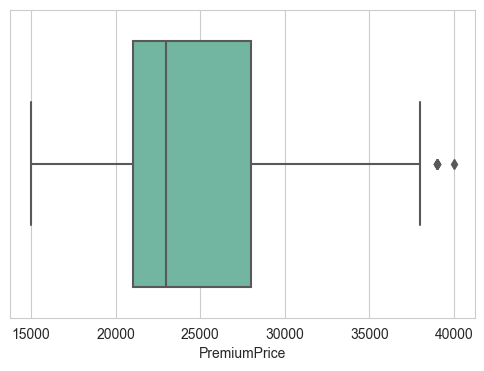

In [8]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PremiumPrice'])

In [9]:
df.nunique()


Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

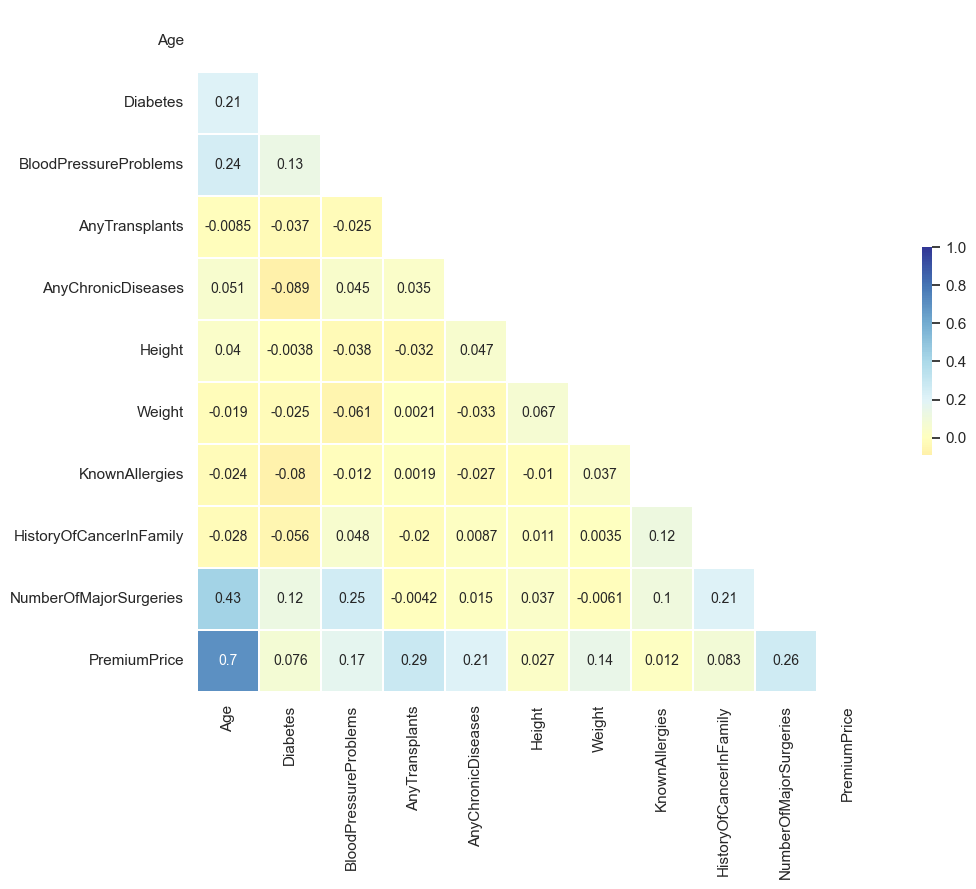

In [10]:
from string import ascii_letters


sns.set_theme(style="white")

# Generate a large random dataset
cols = df.columns

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap="RdYlBu", vmax=1.0, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .3}, annot_kws={"fontsize":10})

plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
input_data = df.drop(columns='PremiumPrice')
output_data = df['PremiumPrice']
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.3,random_state=42)

In [13]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()

In [26]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(input_train_data,output_train_data)
    y_pred_train = model_name.predict(input_train_data)
    y_pred_test = model_name.predict(input_test_data)
    print("The TRAIN r2 score is",r2_score(output_train_data,y_pred_train))
    print("The RMSE score for TRAIN data is",np.sqrt(mean_squared_error(output_train_data,y_pred_train)))
    sns.kdeplot(output_train_data, label='Actual')
    sns.kdeplot(y_pred_train, label='Predicted')
    plt.xlabel('Premium Price')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.show()
    print("--"*50)
    print("The TEST r2 score is",r2_score(output_test_data,y_pred_test))
    print("The RMSE score for TEST data is",np.sqrt(mean_squared_error(output_test_data,y_pred_test)))
    sns.kdeplot(output_test_data, label='Actual')
    sns.kdeplot(y_pred_test, label='Predicted')
    plt.xlabel('Premium Price')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.show()
    



For the LinearRegression()
The TRAIN r2 score is 0.6035854178389605
The RMSE score for TRAIN data is 3821.1215452962074


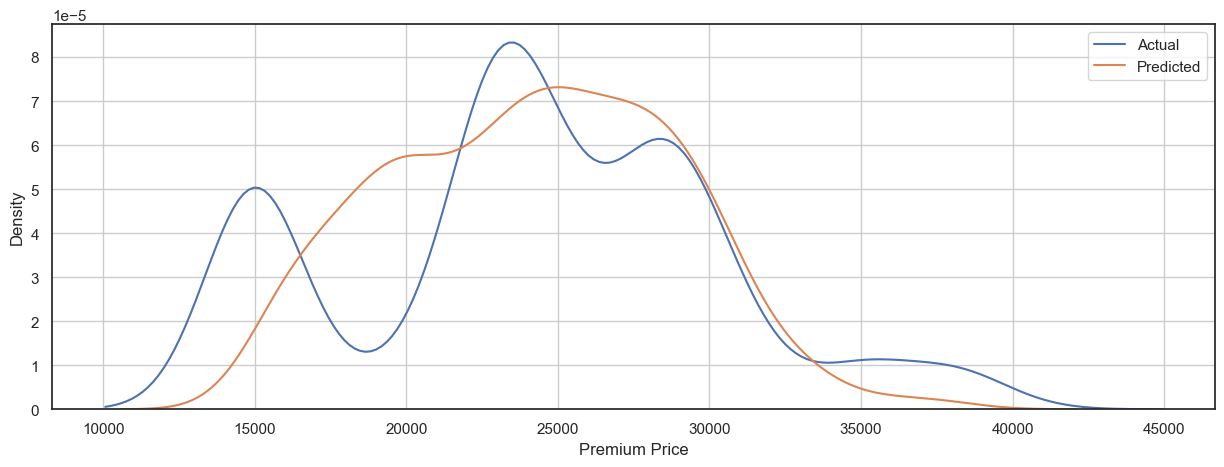

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.7070252058282104
The RMSE score for TEST data is 3584.0047746922437


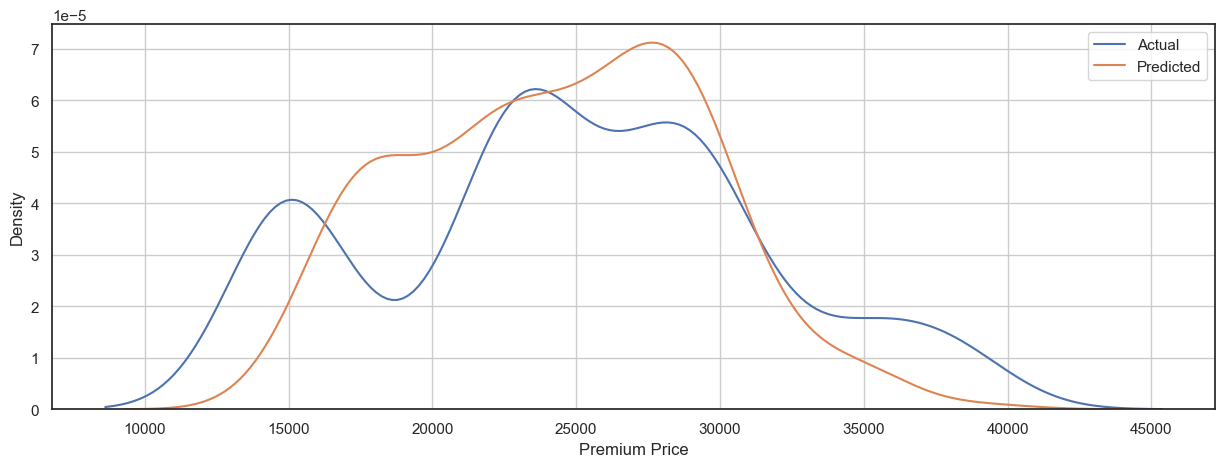

In [17]:
predictor(lr)

For the DecisionTreeRegressor()
The TRAIN r2 score is 1.0
The RMSE score for TRAIN data is 0.0


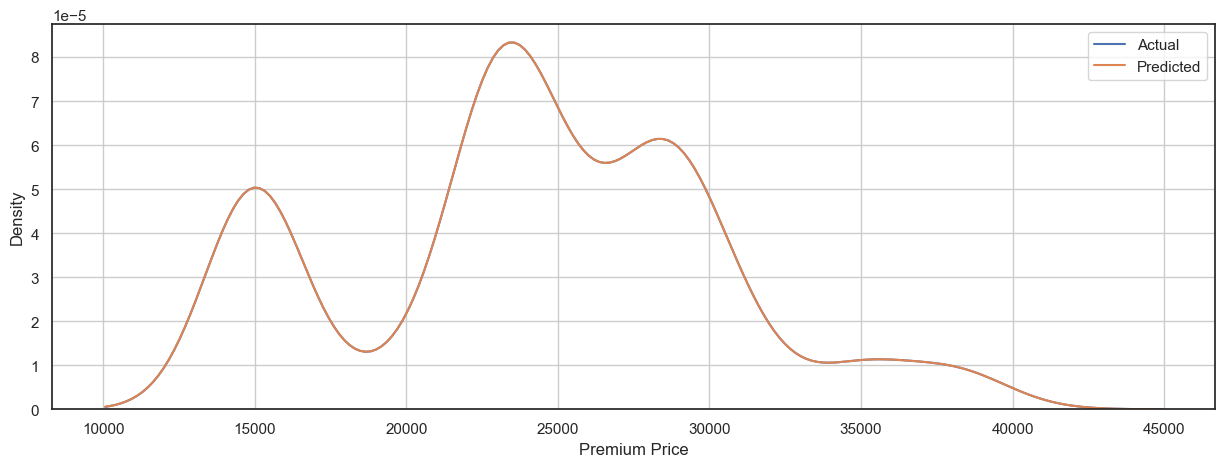

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.6647332604954383
The RMSE score for TEST data is 3833.9697865690496


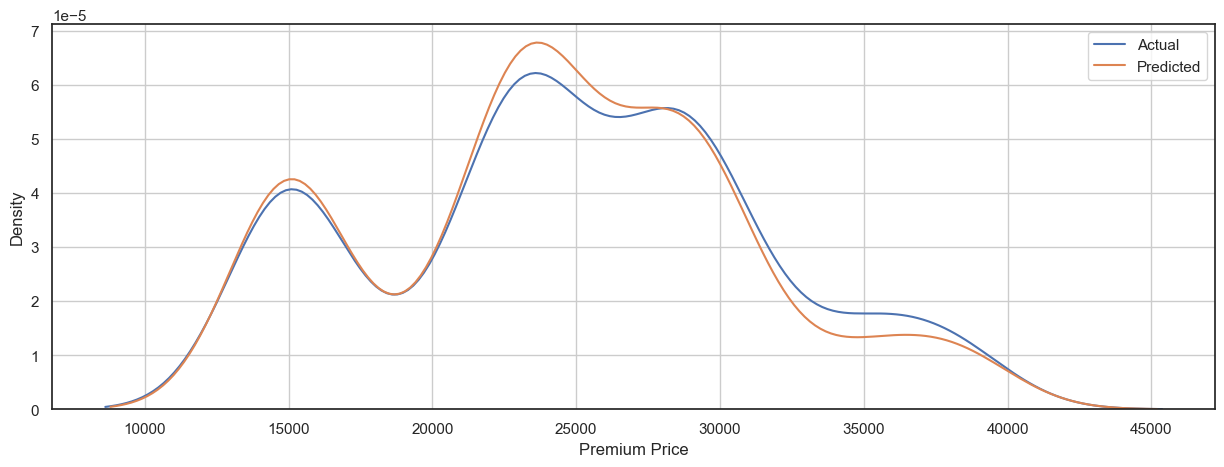

In [18]:
predictor(dt)

For the RandomForestRegressor()
The TRAIN r2 score is 0.9660557482101523
The RMSE score for TRAIN data is 1118.1476659630207


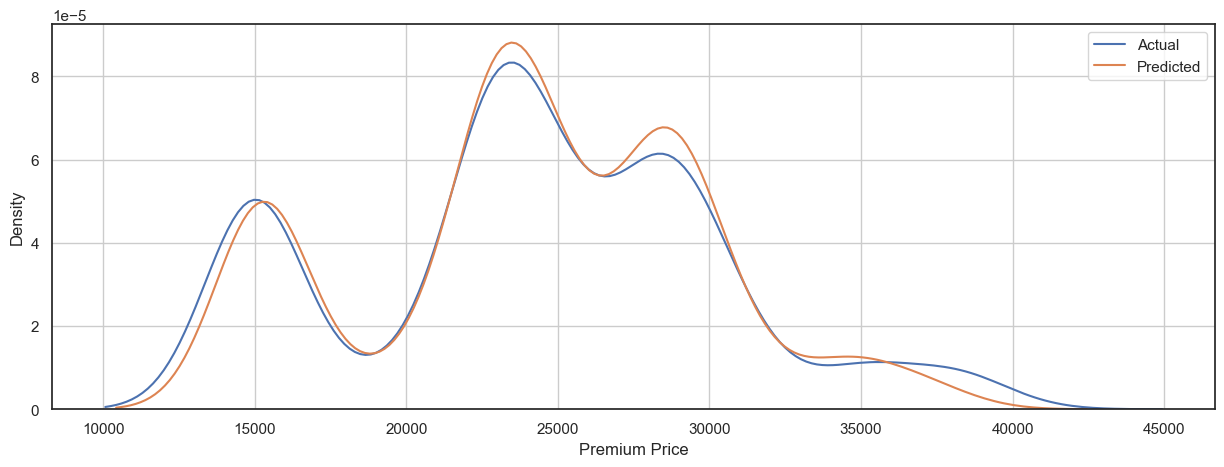

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.8291116378972601
The RMSE score for TEST data is 2737.2199350751803


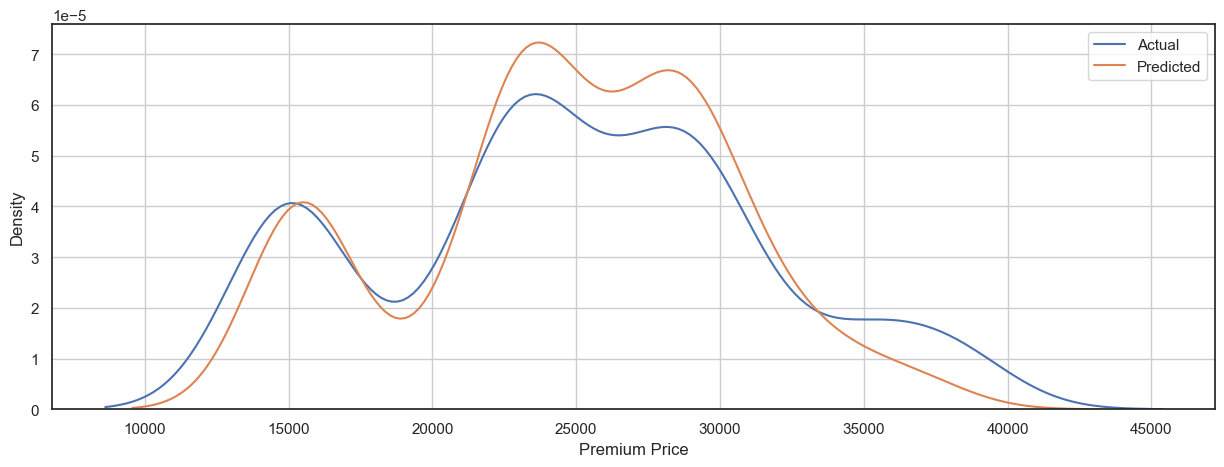

In [19]:
predictor(rf)

For the KNeighborsRegressor()
The TRAIN r2 score is 0.6924697660337265
The RMSE score for TRAIN data is 3365.5802523164725


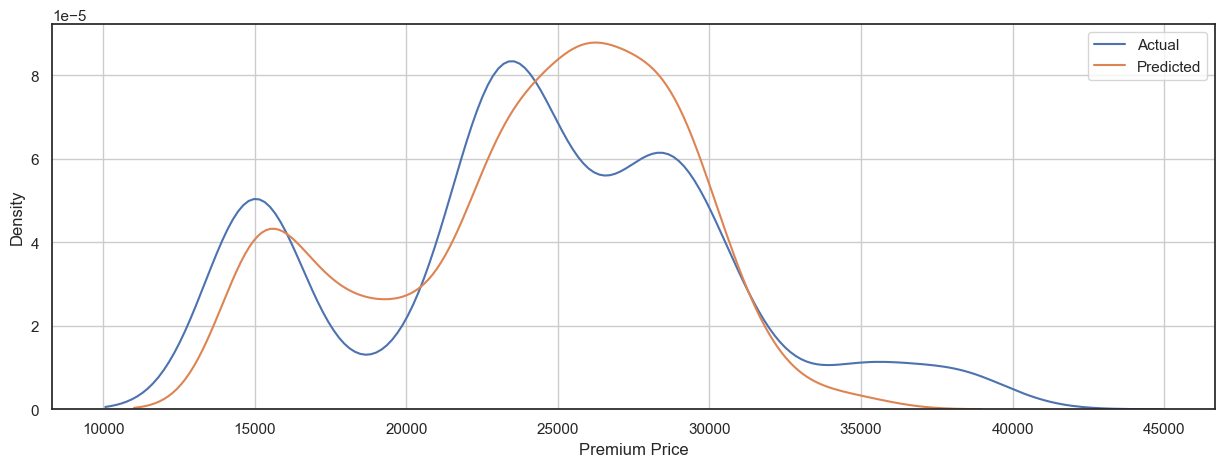

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.5227885199355341
The RMSE score for TEST data is 4574.134093214005


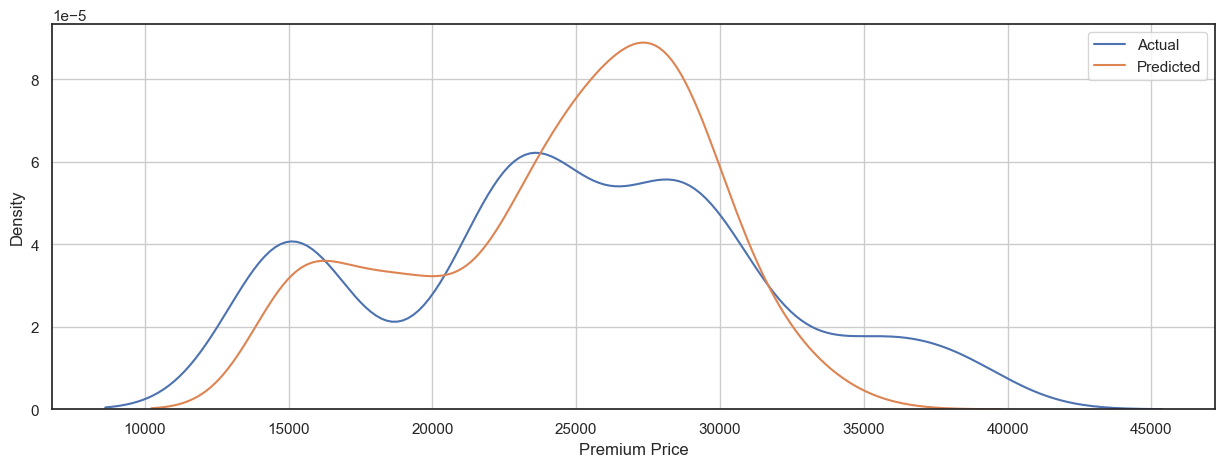

In [20]:
predictor(knn)

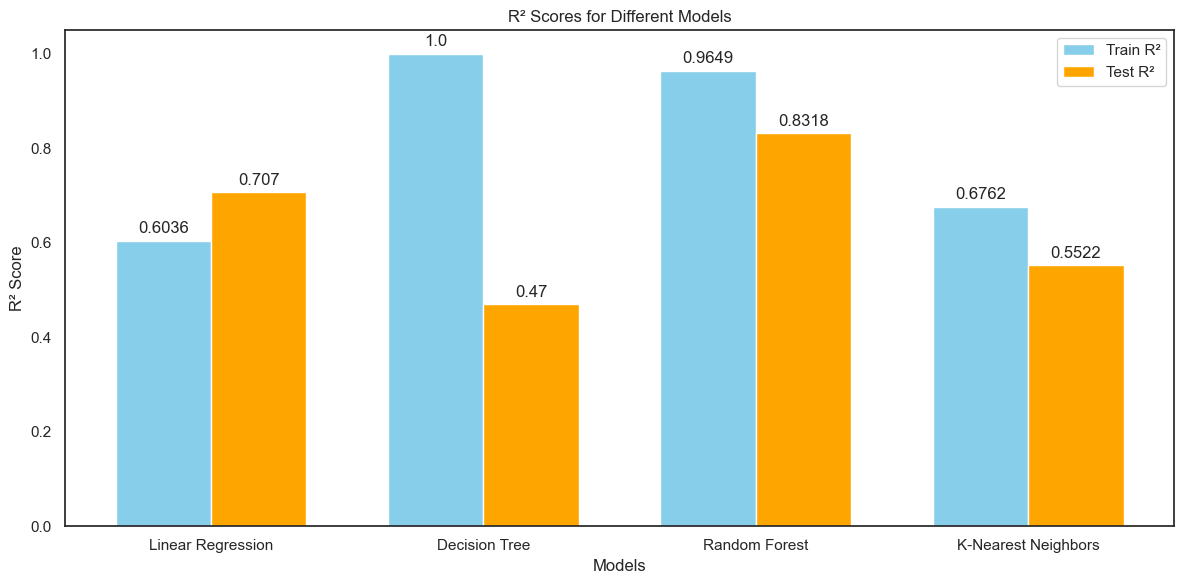

In [21]:
models = ['Linear Regression','Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
train_r2 = [0.6036,1.0, 0.9649, 0.6762]
test_r2 = [0.7070,0.47,0.8318, 0.5522]

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(models))

# Plotting R² Scores
bar1 = ax.bar(index - bar_width/2, train_r2, bar_width, label='Train R²', color='skyblue')
bar2 = ax.bar(index + bar_width/2, test_r2, bar_width, label='Test R²', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('R² Scores for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Adding RMSE Scores as text above the bars
for i in range(len(models)):
    ax.text(index[i] - bar_width/2, train_r2[i] + 0.01, str(train_r2[i]), ha='center', va='bottom')
    ax.text(index[i] + bar_width/2, test_r2[i] + 0.01, str(test_r2[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
#Tuned decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(decision_tree_regressor, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV on the training data
grid_search.fit(input_train_data, output_train_data)

# Get the best estimator from GridSearchCV
best_decision_tree_regressor = grid_search.best_estimator_

# Predict using the test data
decision_tree_predictions = best_decision_tree_regressor.predict(input_test_data)

# Calculate R2 score and MSE
decision_tree_r2 = r2_score(output_test_data, decision_tree_predictions)
mse_decision_tree = mean_squared_error(output_test_data, decision_tree_predictions)

# Calculate RMSE
rmse_decision_tree = np.sqrt(mse_decision_tree)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Decision Tree Regressor R2 Score:", decision_tree_r2)
print("Decision Tree Regressor RMSE:", rmse_decision_tree)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Regressor R2 Score: 0.7886551997419563
Decision Tree Regressor RMSE: 3044.0321452170197


User Input for making prediction


In [23]:

# Create input data array
input_data = np.array([45,0,0,0,0,155,57,0,0,0]).reshape(1, -1)

# Use the best decision tree regressor to make predictions
predicted_value = best_decision_tree_regressor.predict(input_data)[0]
print("Your insurance Premium is:", predicted_value)


Your insurance Premium is: 25000.0


In [24]:
import pickle as pkl

In [25]:
pkl.dump(best_decision_tree_regressor, open('MIPML.pkl','wb'))